# 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso # lasso has the property of setting the coefficients of non-informative 
#variables to zero. This way we can identify those variables and remove them from final models.abs
from sklearn.feature_selection import SelectFromModel# selectfrom model will remove those coeffecients round to zero therefore leaving us with only the selected models

#to diplay all the columns of the dataframe in the notebook
# x =pd.pandas.set_option('display.max_columns',None)

In [2]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
x_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,...,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,...,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,...,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,...,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,...,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [3]:
y_train = x_train['SalePrice']
y_test = x_test['SalePrice']

x_train.drop(['Id','SalePrice'],axis=1,inplace= True)
x_test.drop(['Id','SalePrice'],axis=1,inplace= True)
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,...,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,...,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,...,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,...,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,...,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0.235294,0.75,0.504203,0.387820,1.0,1.0,0.000000,0.333333,1.0,0.0,...,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1310,0.000000,0.75,0.388581,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.0,...,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
1311,0.411765,0.25,0.434909,0.377157,1.0,1.0,0.000000,0.333333,1.0,0.0,...,0.75,1.0,0.0,0.272727,1.00,0.666667,0.75,0.0,0.0,0.0
1312,0.588235,0.75,0.388581,0.176055,1.0,1.0,0.000000,0.333333,1.0,0.0,...,0.75,1.0,0.0,0.818182,0.00,0.666667,0.75,1.0,0.0,0.0


## FEATURE SELECTION

In [4]:
# Doing Model fitting and feature selection in one line of code
#First specifying Lasso regression to select suitable alpha(equivalent of penalty)
#the bigger the alpha the less the features will be selected

#then using selectfrommodel from sklearn, which will select features whose coeffecients are non-zero
sel_ = SelectFromModel(Lasso(alpha = 0.005 , random_state= 0))
sel_.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [5]:
sel_.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [6]:
selected_feat = x_train.columns[(sel_.get_support())]

print('Total Features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('Features that shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_==0)))

selected_feat.shape

Total Features: 82
selected features: 22
Features that shrank to zero: 60


(22,)

In [7]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

### Alternative way : Identifying the selected variables

In [8]:
selected_feats = x_train.columns[(sel_.estimator_.coef_!=0).ravel().tolist()]
selected_feats

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')

In [9]:
pd.Series(selected_feats).to_csv('selected_features.csv',index = False,header = None)

In [10]:
features = pd.read_csv('selected_features.csv',header = None)
features =[ x for x in features[0]]
features= features+['LotFrontage']
print(len(features))
features

23


['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [11]:
x_train = x_train[features]
x_test = x_test[features]

### Regularised Linear Regression

In [12]:
lin_model = Lasso(alpha = 0.005,random_state = 0)
lin_model.fit(x_train,y_train)

Lasso(alpha=0.005, random_state=0)

In [13]:
# Evaluate the model:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
pred1 = lin_model.predict(x_train)  

print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train),np.exp(pred1))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train),np.exp(pred1)))))

pred2 = lin_model.predict(x_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test),np.exp(pred2))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test),np.exp(pred2)))))
print()
print('Average house price ',np.exp(y_train).median())

linear train mse: 1087435415.4414556
linear train rmse: 32976.28565259368
linear test mse: 1405259552.2596054
linear test rmse: 37486.791704006966

Average house price  163000.00000000012


Text(0.5, 1.0, 'Evaluations of Lasso Predictions')

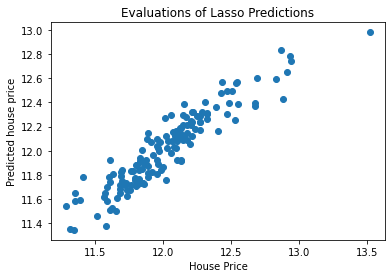

In [14]:
#evaluate or predictions respect to the original price
plt.scatter(y_test,lin_model.predict(x_test))
plt.xlabel('House Price')
plt.ylabel('Predicted house price')
plt.title('Evaluations of Lasso Predictions')

<AxesSubplot:>

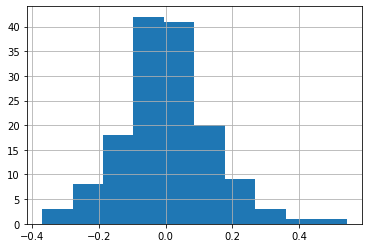

In [15]:
#lets evaluate the distribution of errors
# they should be fairly distributed

errors = y_test -lin_model.predict(x_test)
errors.hist(bins=10)

## Feature Importance

In [16]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance

0     0.018707
1     0.045991
2     0.327383
3     0.435605
4     0.002604
5     0.103513
6     0.020386
7     0.002133
8     0.051895
9     0.075215
10    0.004318
11    0.067347
12    0.113675
13    0.730836
14    0.062812
15    0.115844
16    0.052947
17    0.092023
18    0.042509
19    0.044873
20    0.166016
21    0.007313
22    0.000000
dtype: float64

In [17]:
importance.index = features # copies the values in features on index of importance dataframe
importance

MSSubClass      0.018707
MSZoning        0.045991
Neighborhood    0.327383
OverallQual     0.435605
OverallCond     0.002604
YearRemodAdd    0.103513
RoofStyle       0.020386
MasVnrType      0.002133
BsmtQual        0.051895
BsmtExposure    0.075215
HeatingQC       0.004318
CentralAir      0.067347
1stFlrSF        0.113675
GrLivArea       0.730836
BsmtFullBath    0.062812
KitchenQual     0.115844
Fireplaces      0.052947
FireplaceQu     0.092023
GarageType      0.042509
GarageFinish    0.044873
GarageCars      0.166016
PavedDrive      0.007313
LotFrontage     0.000000
dtype: float64

In [18]:
importance.sort_values(inplace = True , ascending = False)
importance

GrLivArea       0.730836
OverallQual     0.435605
Neighborhood    0.327383
GarageCars      0.166016
KitchenQual     0.115844
1stFlrSF        0.113675
YearRemodAdd    0.103513
FireplaceQu     0.092023
BsmtExposure    0.075215
CentralAir      0.067347
BsmtFullBath    0.062812
Fireplaces      0.052947
BsmtQual        0.051895
MSZoning        0.045991
GarageFinish    0.044873
GarageType      0.042509
RoofStyle       0.020386
MSSubClass      0.018707
PavedDrive      0.007313
HeatingQC       0.004318
OverallCond     0.002604
MasVnrType      0.002133
LotFrontage     0.000000
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

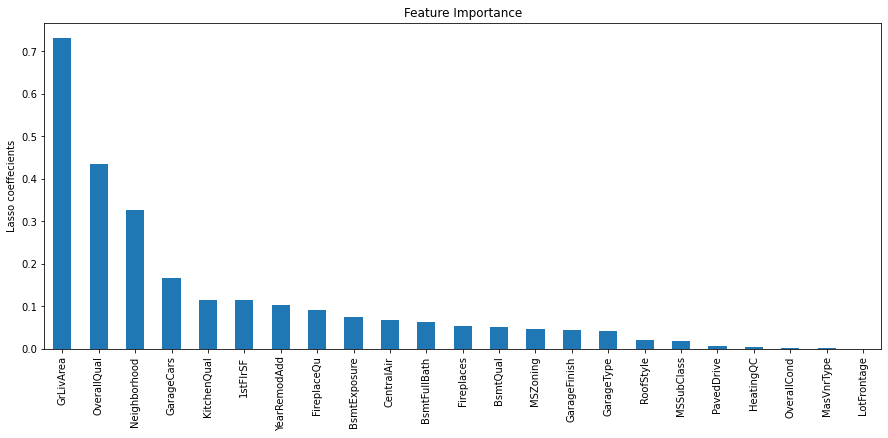

In [19]:
importance.plot.bar(figsize = (15,6))
plt.ylabel('Lasso coeffecients')
plt.title('Feature Importance')